# HR ATTRIBUTION

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# 1.) Import, split data into X/y, plot y data as bar charts, turn X categorical variables binary and tts.

In [2]:
df = pd.read_csv("HR_Analytics.csv")

In [3]:
y = df[["Attrition"]].copy()
X = df.drop("Attrition", axis = 1)

In [4]:
y["Attrition"] = [1 if i == "Yes" else 0 for i in y["Attrition"]]

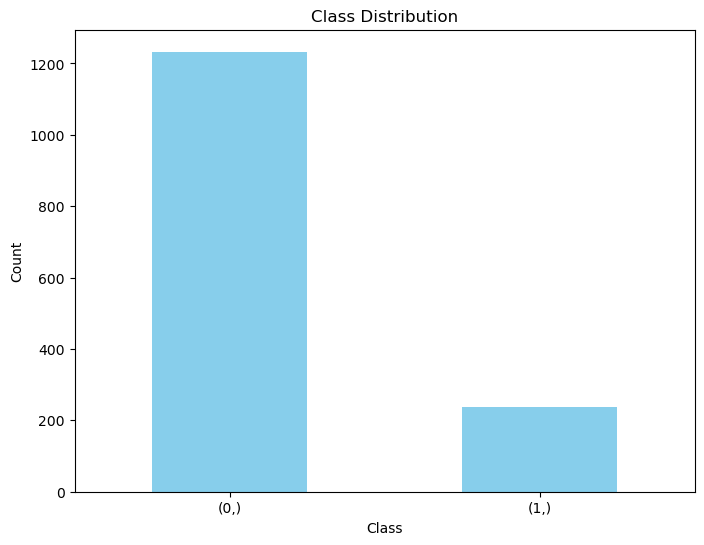

In [5]:
class_counts = y.value_counts()


plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()



In [6]:
# Step 1: Identify string columns
string_columns = X.columns[X.dtypes == 'object']

# Step 2: Convert string columns to categorical
for col in string_columns:
    X[col] = pd.Categorical(X[col])

# Step 3: Create dummy columns
X = pd.get_dummies(X, columns=string_columns, prefix=string_columns,drop_first=True)




In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,
 y, test_size=0.20, random_state=42)


# 2.) Using the default Decision Tree. What is the IN/Out of Sample accuracy?

In [8]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  1.0
OUT OF SAMPLE ACCURACY :  0.79


# 3.) Run a grid search cross validation using F1 score to find the best metrics. What is the In and Out of Sample now?

In [9]:
# DTC(cv:gini, next_depth:1, 2, 3, 4...11)
# Define the hyperparameter grid to search through
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),  # Range of max_depth values to try
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_classifier = DecisionTreeClassifier(random_state=42)

scoring = make_scorer(f1_score, average='weighted')

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scoring, cv=5)

grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params) #used to create a decision tree 
print("Best F1-Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best F1-Score: 0.8214764475510983


In [10]:
clf = tree.DecisionTreeClassifier(**best_params, random_state =42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)
print("IN SAMPLE ACCURACY : " , round(acc,2))

y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("OUT OF SAMPLE ACCURACY : " , round(acc,2))

IN SAMPLE ACCURACY :  0.91
OUT OF SAMPLE ACCURACY :  0.83


# 4.) Plot ......

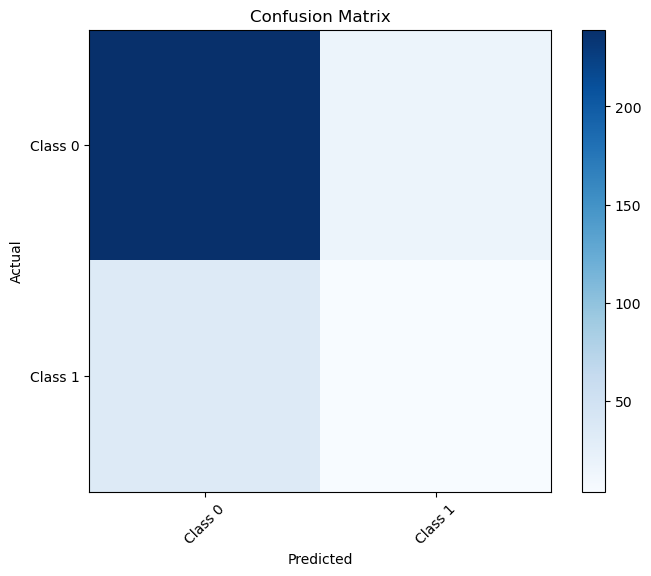

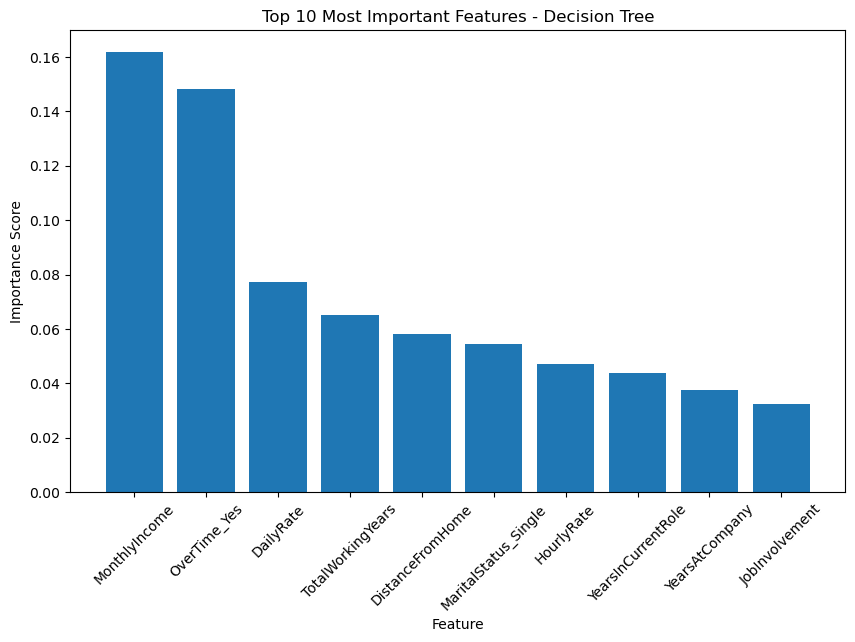

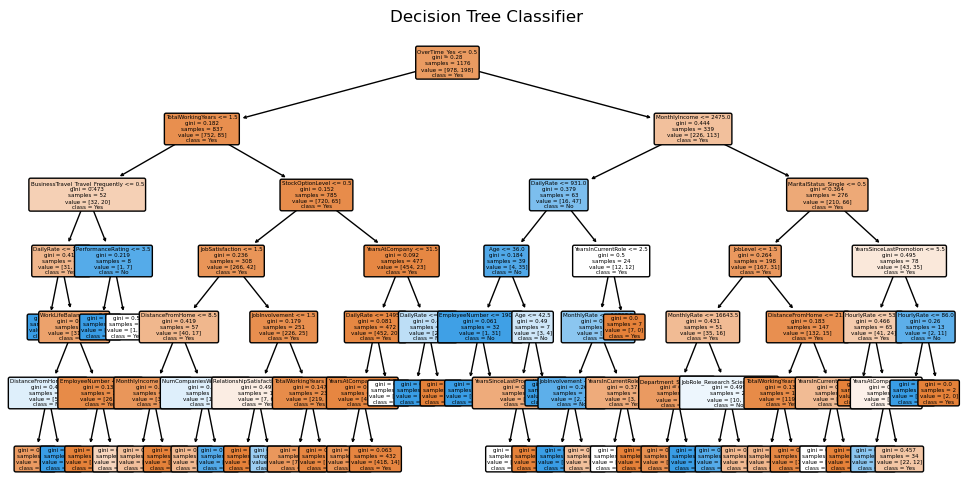

In [11]:
# Make predictions on the test data y_pred = clf.predict(x_test)
y_pred = clf.predict(x_test)
y_prob = clf.predict_proba(x_test)[:, 1] 
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues) 
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45) 
plt.yticks(tick_marks, ['Class 0', 'Class 1']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importance = clf.feature_importances_ 
#by which is first splitted
# Sort features by importance and select the top 10
top_n = 10
top_feature_indices = np.argsort(feature_importance)[::-1][:top_n] 
top_feature_names = X.columns[top_feature_indices] 
top_feature_importance = feature_importance[top_feature_indices]
# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(top_feature_names, top_feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top 10 Most Important Features - Decision Tree') 
plt.xticks(rotation=45)
plt.show()

# Plot the Decision Tree for better visualization of the selected features
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=["Yes", "No"], rounded=True, fontsize=4) 
plt.title('Decision Tree Classifier')
plt.show()


# 5.) Looking at the graphs. what would be your suggestions to try to improve customer retention? What additional information would you need for a better plan. Plot anything you think would assist in your assessment.

## ANSWER : 
Based on the data results, to improve customer retention, the company should increase the monthly income of employees and decrease the frequency of overtime work.

In [12]:
from scipy.stats import pearsonr

In [13]:
# 
def calculate_correlation(X, feature_name, y):
    feature = X[feature_name]
    coef, _ = pearsonr(feature,y)
    return (coef)

In [14]:
# calculate_correlation(X, "MonthlyIncome", y)

In [15]:
np.corrcoef(np.array(X["OverTime_Yes"]), np.array(y["Attrition"]))

array([[1.        , 0.24611799],
       [0.24611799, 1.        ]])

In [16]:
np.corrcoef(np.array(X["MonthlyIncome"]), np.array(y["Attrition"]))

array([[ 1.        , -0.15983958],
       [-0.15983958,  1.        ]])

# 6.) Using the Training Data, if they made everyone work overtime. Made no one work over time. What would have been the expected difference in client attrition?

# Answer: 
If they made everyone work overtime, there will be 141 more clients choose attrition, on the other hand, if they made no one work overtime, there will be 59 less clients choose attrition.

In [17]:
x_train_experiment = x_train.copy()

In [18]:
x_train_experiment["OverTime_Yes"] = 0

In [19]:
y_pred = clf.predict(x_train)
y_pred_experiment = clf.predict(x_train_experiment)

In [20]:
diff = sum(y_pred-y_pred_experiment)

In [21]:
print("Change for Attrition", diff)

Change for Attrition 59


In [22]:
x_train_experiment = x_train.copy()

In [23]:
x_train_experiment["OverTime_Yes"] = 1

In [24]:
y_pred = clf.predict(x_train)
y_pred_experiment = clf.predict(x_train_experiment)

In [25]:
diff = sum(y_pred-y_pred_experiment)

In [26]:
print("Change for Attrition", diff)

Change for Attrition -141


# 7.) If they company loses an employee, there is a cost to train a new employee for a role ~2.8 * their monthly income.
# To make someone not work overtime costs the company 2K per person.
# Is it profitable for the company to remove overtime? If so/not by how much? 
# What do you suggest to maximize company profits?

In [27]:
x_train_experiment.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1097,24,350,21,2,1,1551,3,57,2,1,...,True,False,False,False,False,False,False,False,False,1
727,18,287,5,2,1,1012,2,73,3,1,...,False,False,False,False,True,False,False,False,True,1
254,29,1247,20,2,1,349,4,45,3,2,...,False,False,False,False,False,True,False,False,False,1
1175,39,492,12,3,1,1654,4,66,3,2,...,False,False,True,False,False,False,False,True,False,1
1341,31,311,20,3,1,1881,2,89,3,2,...,True,False,False,False,False,False,False,False,False,1


In [28]:
x_train_experiment["Y"] = y_pred
x_train_experiment["Y_exp"] = y_pred_experiment

In [29]:
x_train_experiment["RetChange"] = x_train_experiment["Y_exp"]-x_train_experiment["Y"]

In [30]:
sav = sum(-2.8*x_train_experiment["RetChange"]*x_train_experiment["MonthlyIncome"])

In [31]:
cost = len(x_train[x_train["OverTime_Yes"]==1])*2000

In [32]:
sav-cost

-2111037.2

## ANSWER : 
Base one the data provided and the model prediction, the company should make more people work overtime so that they can maximize the company profits. Otherwise if they choose no one work overtime, they will lose money.

# 8.) Use your model and get the expected change in retention for raising and lowering peoples income. Plot the outcome of the experiment. Comment on the outcome of the experiment and your suggestions to maximize profit.

In [33]:
profit = []
for raise_amount in range(-1000, 1000, 100):
    x_train_experiment = x_train.copy()
    x_train_experiment["MonthlyIncome"] = x_train_experiment["MonthlyIncome"]+ raise_amount

    y_pred = clf.predict(x_train)
    y_pred_experiment = clf.predict(x_train_experiment)

    diff = sum(y_pred-y_pred_experiment)

    x_train_experiment["Y"] = y_pred
    x_train_experiment["Y_exp"] = y_pred_experiment
    x_train_experiment["RetChange"] = x_train_experiment["Y_exp"]-x_train_experiment["Y"]
    sav = sum(-2.8*x_train_experiment["RetChange"]*x_train_experiment["MonthlyIncome"])
    cost = len(x_train)*raise_amount

    profit.append(sav-cost)

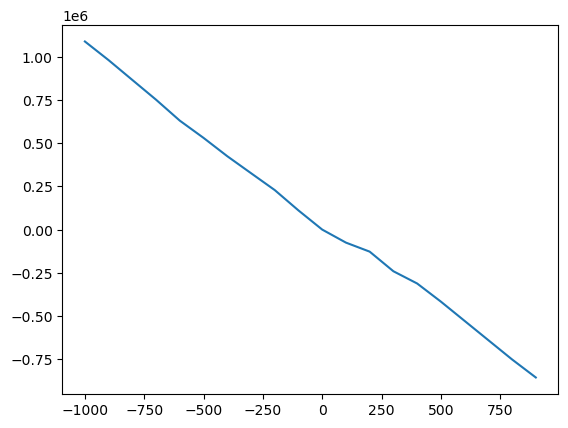

In [34]:
plt.plot(range(-1000, 1000, 100), profit)
plt.show()

## ANSWER : 
There's a negative linear relationship between monthly income of clients and company profits. Based on the data, the company should make the monthly income of clients as much low as possible. But in practice, this will affect the working motivation of clients, leading to less productivity, which will hurt the company in the long term.